# Capstone - Sprint 1:
## Music recommendation engine using spotify API and feedback loop integration to create playlists

In [45]:
# Importing the necessary libraries to conduct EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Initial EDA:

In [34]:
# Importing data from csv file and aliasing
song_df = pd.read_csv('tracks_features.csv')

In [35]:
# Observing df head to sense check
song_df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [ ]:
# Changing the name of the column 'explicit' to is_explicit to better align with bollean standard practice

In [65]:
song_df = song_df.rename(columns={'explicit': 'is_explicit'})

In [66]:
# Observing the df columns to further sense check and ensure rename successful
song_df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'is_explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [57]:
# Observing the data types
song_df.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

In [37]:
# Observing the df shape
song_df.shape

(1204025, 24)

In [42]:
print(song_df.info)

<bound method DataFrame.info of                              id                   name  \
0        7lmeHLHBe4nmXzuXc0HDjk                Testify   
1        1wsRitfRRtWyEapl0q22o8        Guerrilla Radio   
2        1hR0fIFK2qRG3f3RF70pb7       Calm Like a Bomb   
3        2lbASgTSoDO7MTuLAXlTW0              Mic Check   
4        1MQTmpYOZ6fcMQc56Hdo7T  Sleep Now In the Fire   
...                         ...                    ...   
1204020  0EsMifwUmMfJZxzoMPXJKZ         Gospel of Juke   
1204021  2WSc2TB1CSJgGE0PEzVeiu          Prism Visions   
1204022  6iProIgUe3ETpO6UT0v5Hg              Tokyo 360   
1204023  37B4SXC8uoBsUyKCWnhPfX                 Yummy!   
1204024  3GgQmOxxLyRoAb4j86zOBX   That's The Way It Is   

                             album                album_id  \
0        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
1        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
2        The Battle Of Los Angeles  2eia0myWFgoHuttJytCxgX   
3        The Battle Of 

In [58]:
song_df.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06
mean,7.656352e+00,1.055906e+00,4.930565e-01,5.095363e-01,5.194151e+00,-1.180870e+01,6.714595e-01,8.438219e-02,4.467511e-01,2.828605e-01,2.015994e-01,4.279866e-01,1.176344e+02,2.488399e+05,3.832494e+00,2.007328e+03
std,5.994977e+00,2.953752e-01,1.896694e-01,2.946839e-01,3.536731e+00,6.982132e+00,4.696827e-01,1.159914e-01,3.852014e-01,3.762844e-01,1.804591e-01,2.704846e-01,3.093705e+01,1.622104e+05,5.611826e-01,1.210117e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,3.560000e-01,2.520000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740900e+05,4.000000e+00,2.002000e+03
50%,7.000000e+00,1.000000e+00,5.010000e-01,5.240000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243390e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.330000e-01,7.660000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05,4.000000e+00,2.015000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


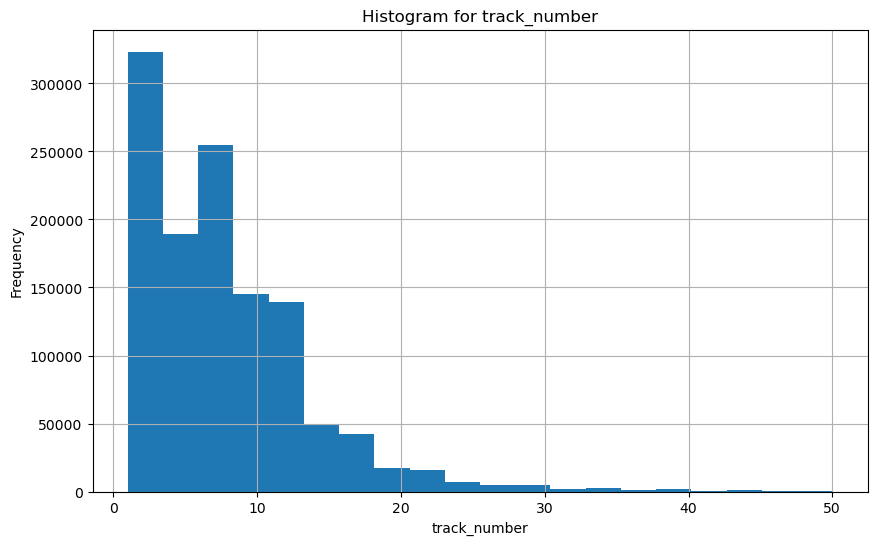

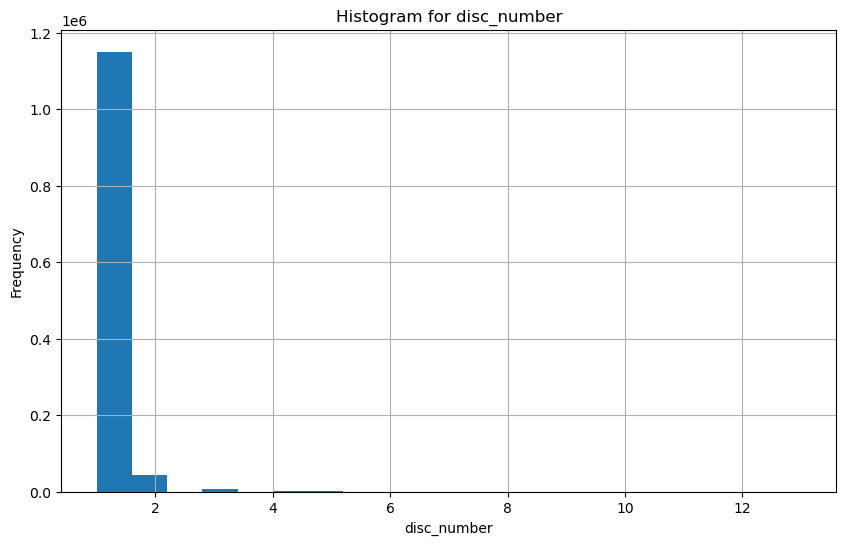

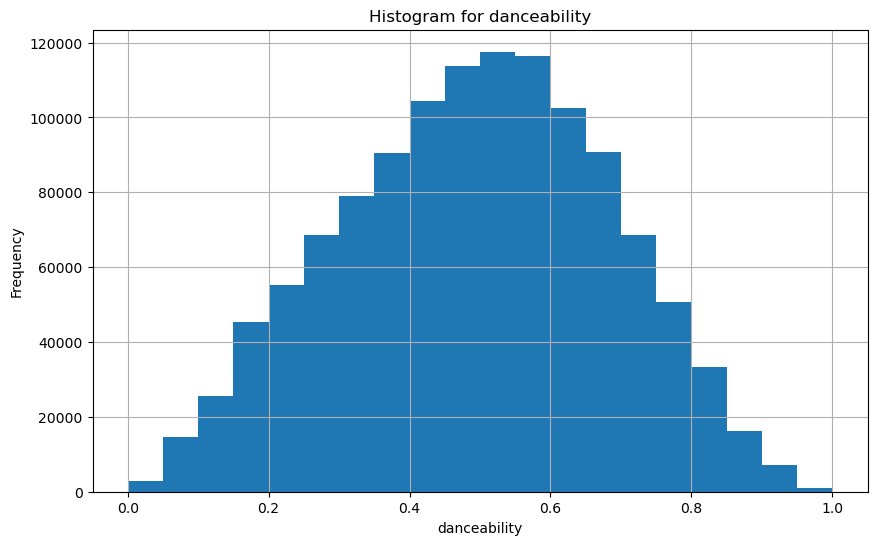

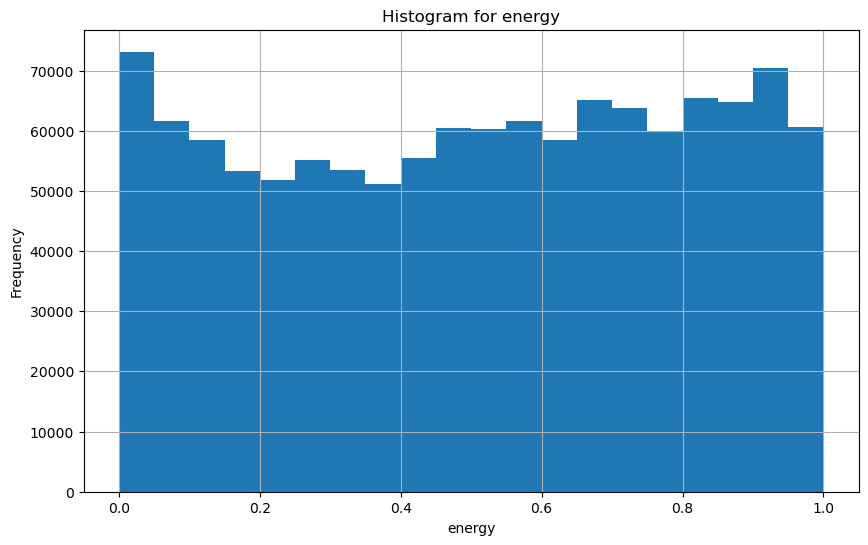

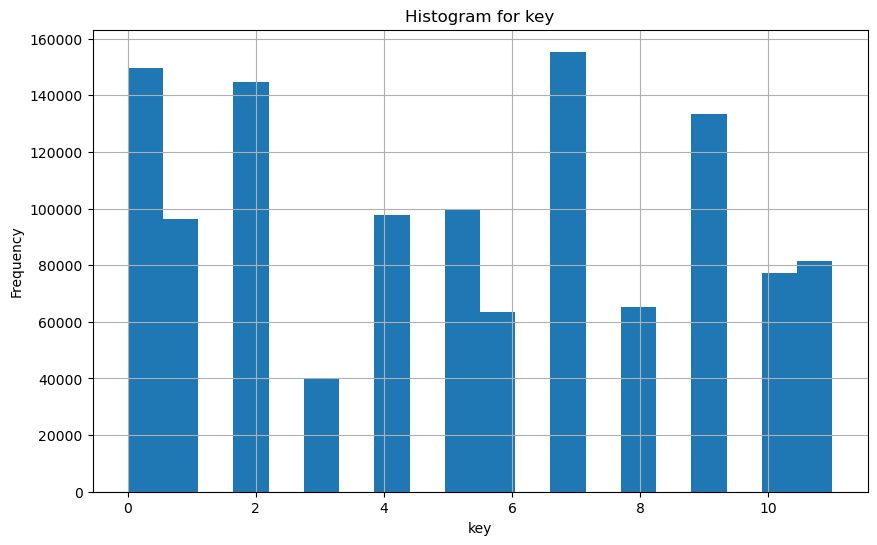

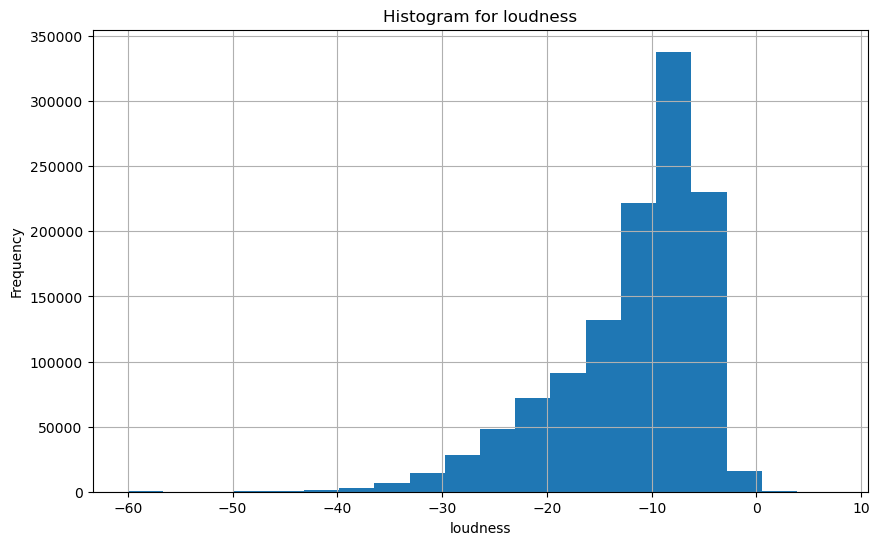

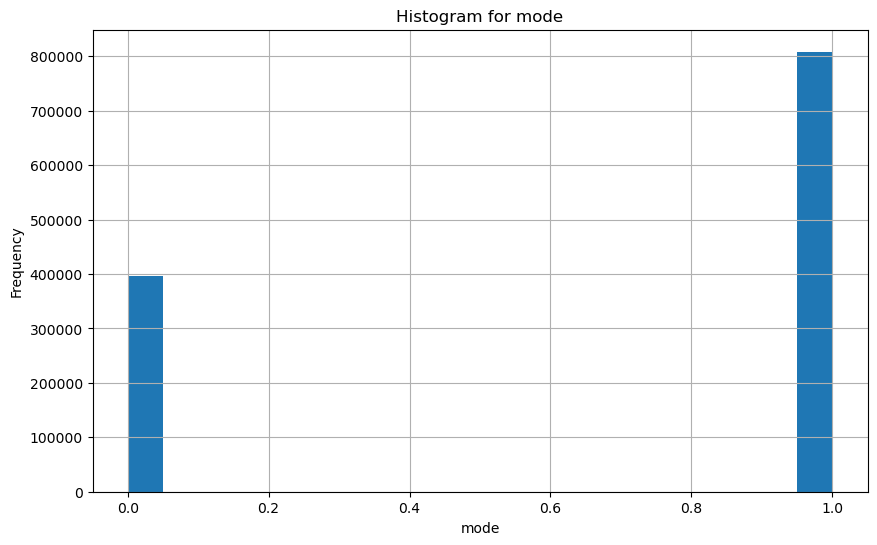

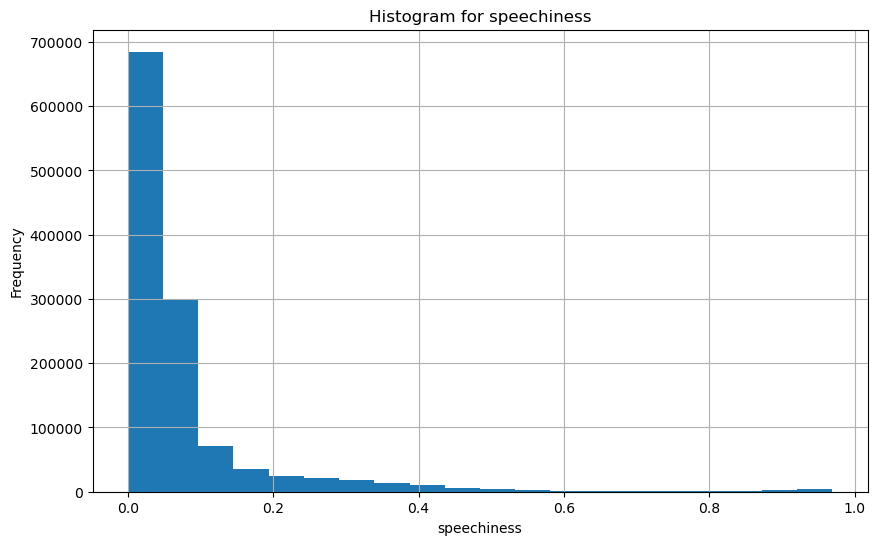

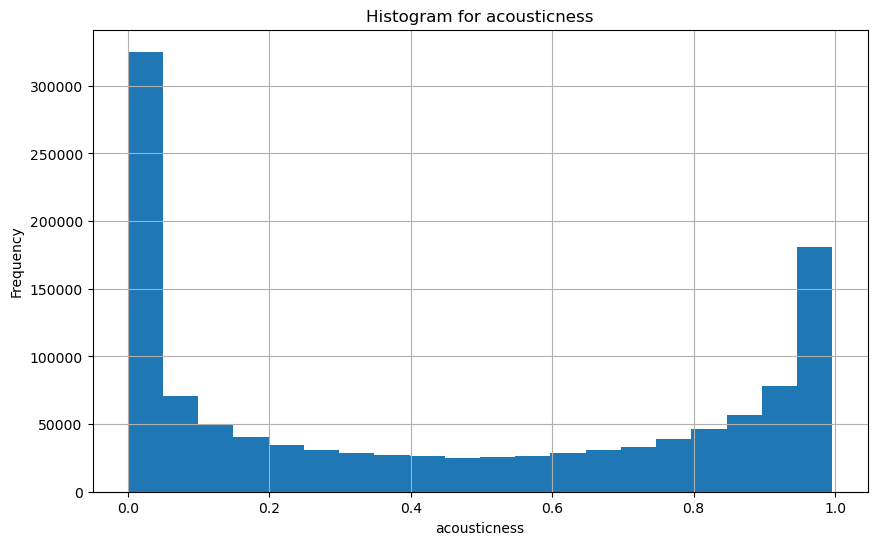

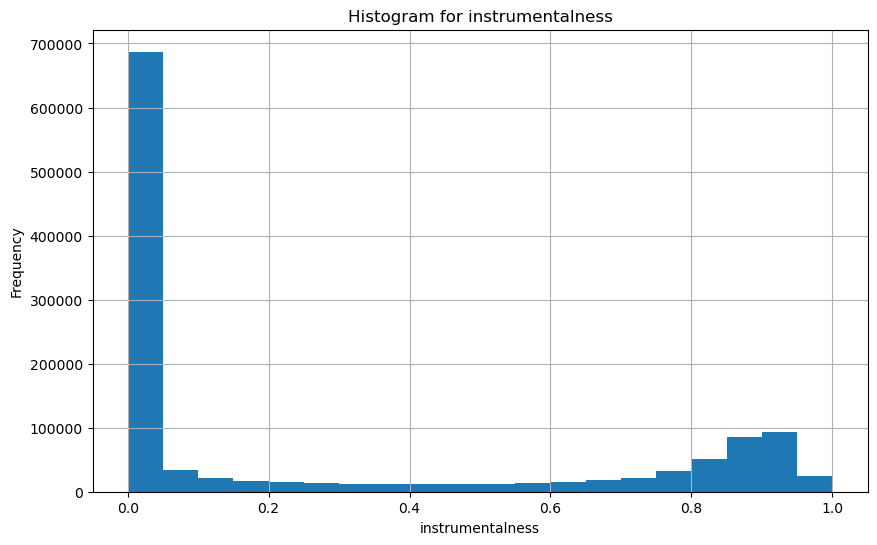

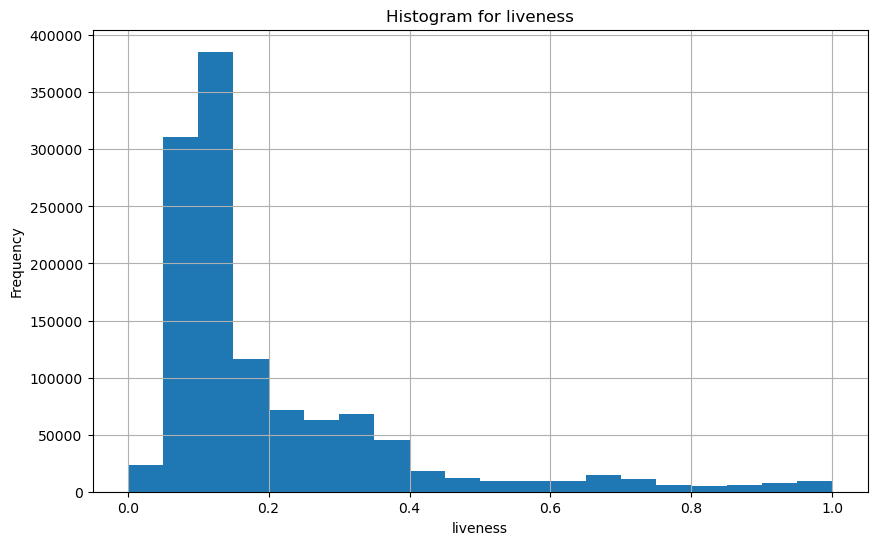

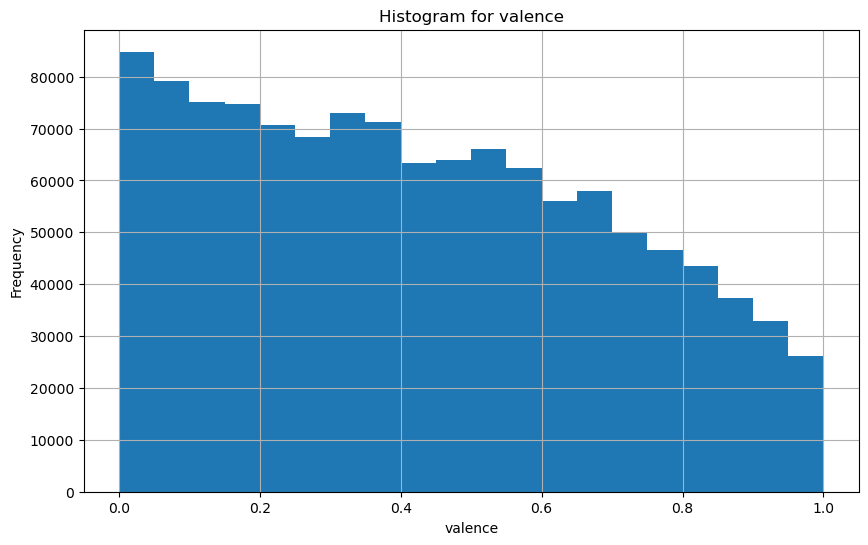

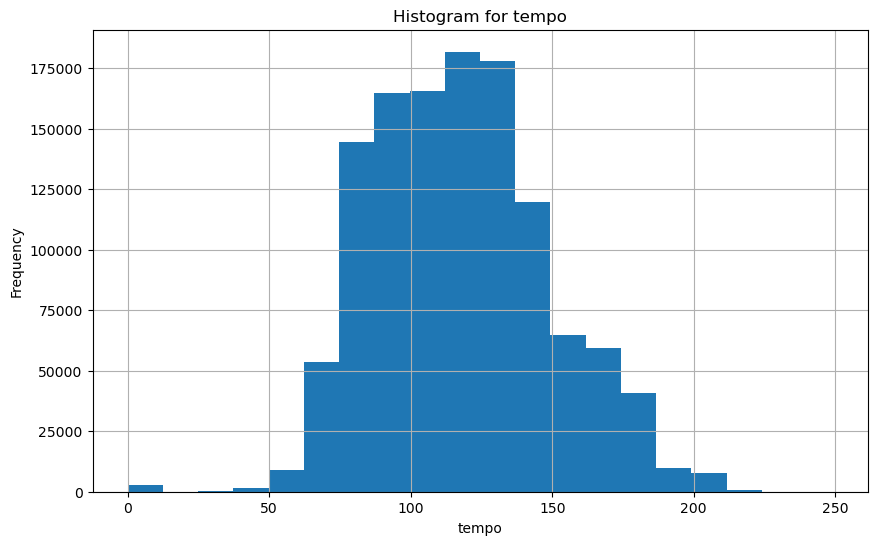

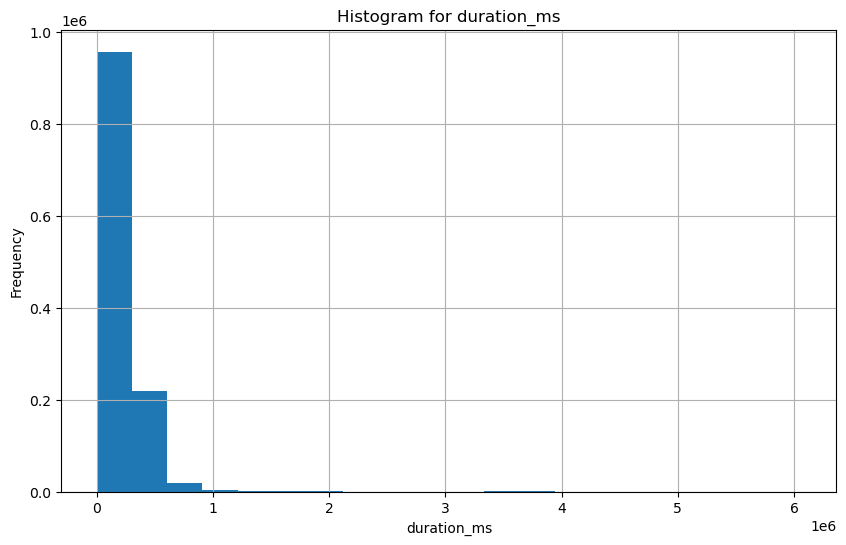

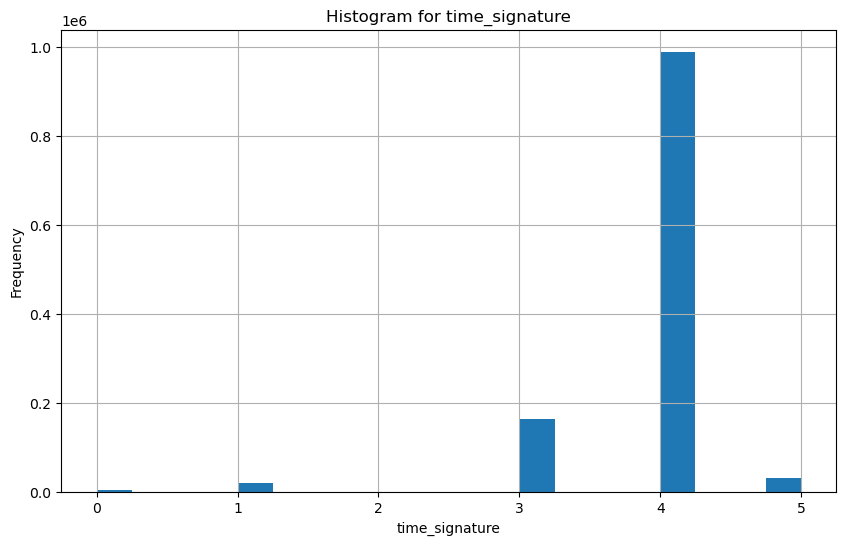

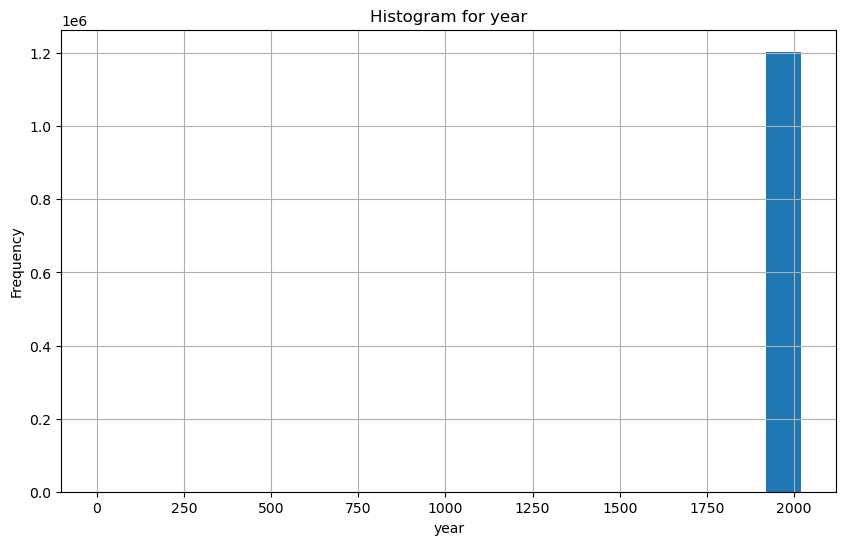

In [49]:
# Select only numerical columns
numerical_columns = song_df.select_dtypes(include=['number'])

# Get the list of numerical column names
numerical_column_names = numerical_columns.columns

# Iterate through each numerical column and create a histogram
for column in numerical_column_names:
    plt.figure(figsize=(10, 6))
    numerical_columns[column].hist(bins=20)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

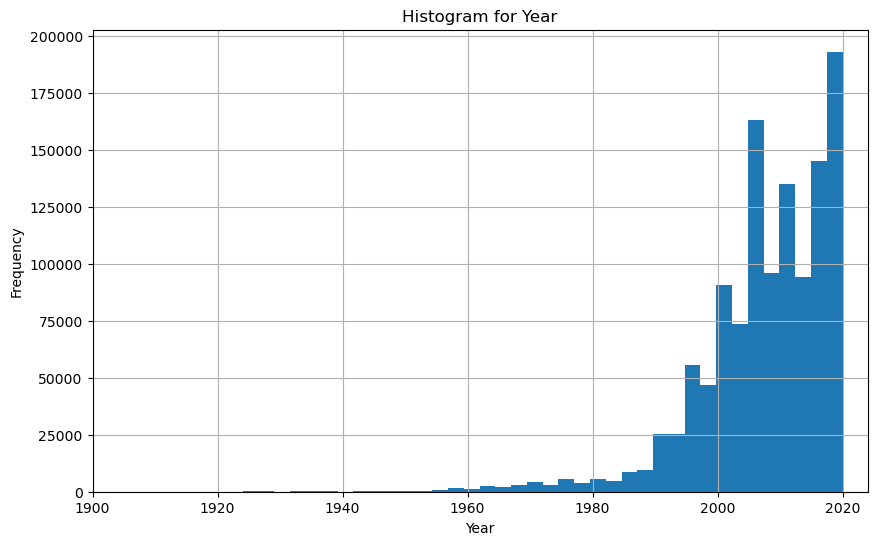

In [61]:
# Plotting year again as histogram scale does not give enough granularity
plt.figure(figsize=(10, 6))
song_df['year'].hist(bins=800)
plt.title('Histogram for Year')
plt.xlabel('Year')  # Corrected from column to 'Year'
plt.ylabel('Frequency')
# Set the x-axis range
plt.xlim(1900, 2024)
plt.show()

From the above we can see the data is somewhat limited in that we have no data prior to 2020.

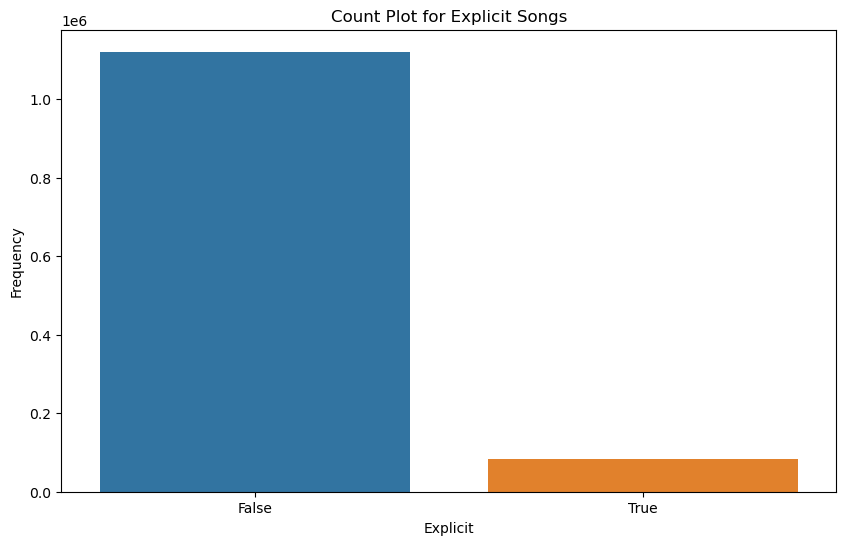

In [69]:
# Count plot of explicit songs
plt.figure(figsize=(10, 6))
sns.countplot(x='is_explicit', data=song_df)
plt.title('Count Plot for Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Frequency')
plt.show()

## Null Values:

In [63]:
song_df.isnull().sum()

id                   0
name                 3
album               11
album_id             0
artists              0
artist_ids           0
track_number         0
disc_number          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
year                 0
release_date         0
dtype: int64

The datais incredibly clean with only 3 null values in the 'name' column and 11 null values in the 'album' column - due to the small number of null values th

## Multicollinearity:

Plotting a correlation heatmap to understand correlation between numerical variables and give an idea of multicollinearity.

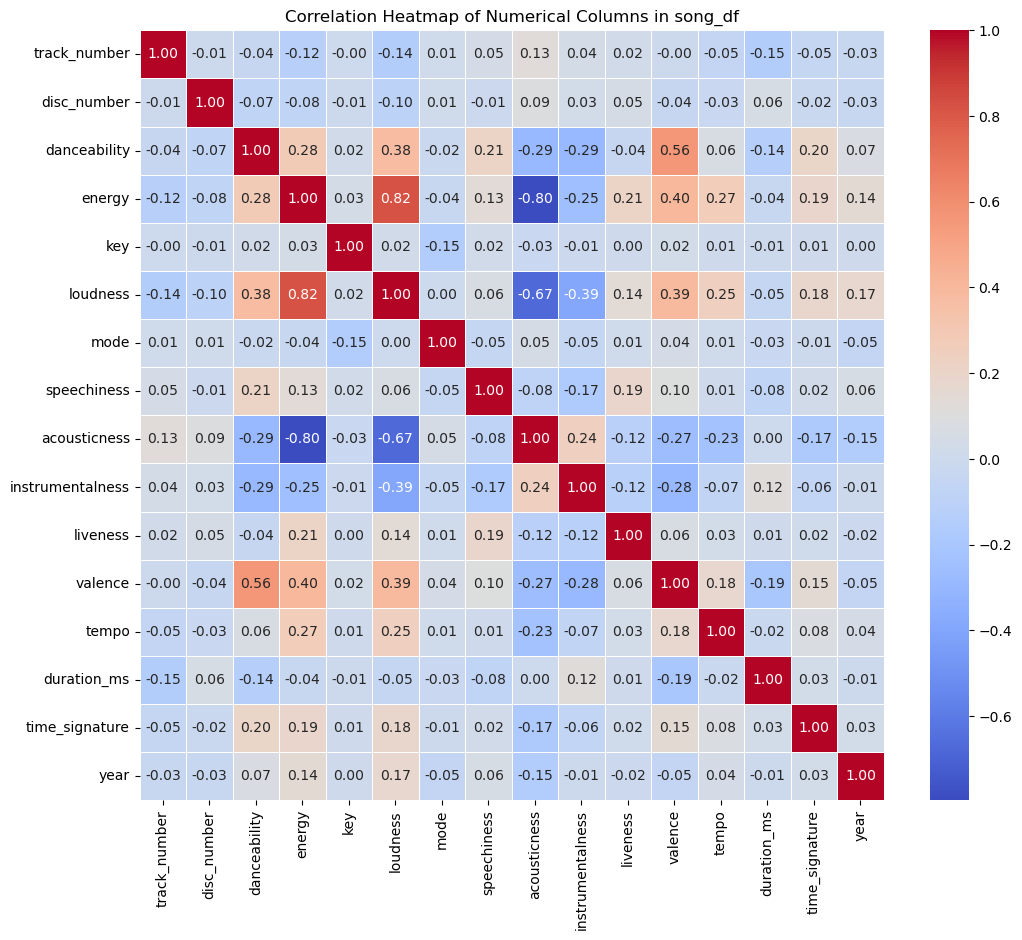

In [50]:
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a Seaborn heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap of Numerical Columns in song_df')
plt.show()

# Genres Dataset:

In [70]:
# Importing data from csv file and aliasing
genres_df = pd.read_csv('data_by_genres.csv')

In [71]:
genres_df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [72]:
genres_df.columns

Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

In [73]:
genres_df.shape

(2973, 14)

In [76]:
unique_genres_count = genres_df['genres'].nunique()
print("Number of unique values in the 'genre' column:", unique_genres_count)

Number of unique values in the 'genre' column: 2973


## Feature Engineering/ next steps:

The data is largely exhaustive, however notably doesn't classify any of the songs by Genre - I believe this feature will be very useful in determining the 